In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import scipy
import neurolib.utils.devutils as du

from neurolib.models.wc import WCModel

import neurolib.utils.loadData as ld
import neurolib.utils.functions as func
from neurolib.utils.loadData import Dataset
from scipy.io import loadmat
from neurolib.utils.loadData import filterSubcortical

# a nice color map
plt.rcParams['image.cmap'] = 'plasma'
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200

from matplotlib import rc
import matplotlib.pylab as plt

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [29]:
input_excext = [0.0,
 0.015151515151515152,
 0.030303030303030304,
 0.045454545454545456,
 0.06060606060606061,
 0.07575757575757576,
 0.09090909090909091,
 0.10606060606060606,
 0.12121212121212122,
 0.13636363636363635,
 0.15151515151515152,
 0.16666666666666669,
 0.18181818181818182,
 0.19696969696969696,
 0.21212121212121213,
 0.2272727272727273,
 0.24242424242424243,
 0.25757575757575757,
 0.2727272727272727,
 0.2878787878787879,
 0.30303030303030304,
 0.3181818181818182,
 0.33333333333333337,
 0.3484848484848485,
 0.36363636363636365,
 0.3787878787878788,
 0.3939393939393939,
 0.4090909090909091,
 0.42424242424242425,
 0.4393939393939394,
 0.4545454545454546,
 0.4696969696969697,
 0.48484848484848486,
 0.5,
 0.5151515151515151,
 0.5303030303030303,
 0.5454545454545454,
 0.5606060606060607,
 0.5757575757575758,
 0.5909090909090909,
 0.6060606060606061,
 0.6212121212121212,
 0.6363636363636364,
 0.6515151515151515,
 0.6666666666666667,
 0.6818181818181819,
 0.696969696969697,
 0.7121212121212122,
 0.7272727272727273,
 0.7424242424242424,
 0.7575757575757576,
 0.7727272727272727,
 0.7878787878787878,
 0.8030303030303031,
 0.8181818181818182,
 0.8333333333333334,
 0.8484848484848485,
 0.8636363636363636,
 0.8787878787878788,
 0.8939393939393939,
 0.9090909090909092,
 0.9242424242424243,
 0.9393939393939394,
 0.9545454545454546,
 0.9696969696969697,
 0.9848484848484849,
 1.0,
 1.0151515151515151,
 1.0303030303030303,
 1.0454545454545454,
 1.0606060606060606,
 1.0757575757575757,
 1.0909090909090908,
 1.1060606060606062,
 1.1212121212121213,
 1.1363636363636365,
 1.1515151515151516,
 1.1666666666666667,
 1.1818181818181819,
 1.196969696969697,
 1.2121212121212122,
 1.2272727272727273,
 1.2424242424242424,
 1.2575757575757576,
 1.2727272727272727,
 1.2878787878787878,
 1.303030303030303,
 1.3181818181818181,
 1.3333333333333335,
 1.3484848484848486,
 1.3636363636363638,
 1.378787878787879,
 1.393939393939394,
 1.4090909090909092,
 1.4242424242424243,
 1.4393939393939394,
 1.4545454545454546,
 1.4696969696969697,
 1.4848484848484849,
 1.5]

gbc_model_excext =[0.9992871304577255, 0.999273003443306, 0.9992585109596825, 0.9992436329277034, 0.9992283439762553, 0.9992126119875574, 0.9991963962692385, 0.9991796452470687, 0.9991622935343972, 0.999144258181118, 0.9991254338265426, 0.9991056863648992, 0.9990848445571356, 0.9990626887528279, 0.9990389354594416, 0.999013215805297, 0.9989850447881943, 0.9989537762090659, 0.9989185346111624, 0.998878108820621, 0.9988307783422072, 0.9987740155977837, 0.9987039420049261, 0.9986142498649219, 0.9984938127966436, 0.9983204306066997, 0.9980389633306214, 0.9973917262961549, 0.8973780831424725, 0.18431769579795215, 0.4925046360736492, 0.6074417503452153, 0.8389636584026414, 0.7652578406917274, 0.7009582854729625, 0.6807363404193848, 0.6966482829600128, 0.7611122667324893, 0.5752893828829719, 0.7390287544044589, 0.5716910955265297, 0.6574736200237322, 0.7462981204406037, 0.807870900363155, 0.7752410842934787, 0.8018224076245772, 0.8454339962765087, 0.8453471719751604, 0.865065137863424, 0.8746539211658073, 0.8697393512780142, 0.9100110338465873, 0.8973030500415043, 0.9134820934135908, 0.8508061961421381, 0.8139216901654678, 0.9058845023474416, 0.8939866282827392, 0.887688422268543, 0.8605105970250392, 0.8828240409689146, 0.8886004102980803, 0.9056703513578822, 0.8772658420136378, 0.8618014188845673, 0.8333636092815158, 0.7809092732339173, 0.7215262042936904, 0.7289089099733134, 0.8241821742443147, 0.9025473155559581, 0.9423120227226228, 0.9433097169417684, 0.9493538287731726, 0.9905669882313481, 0.9976936700333731, 0.9957668040893861, 0.9969833354758438, 0.9998546371810844, 0.9999955681886985, 0.9999966934561102, 0.9999972577255337, 0.9999976324946787, 0.9999979085190777, 0.9999981234894045, 0.999998296994398, 0.9999984405982865, 0.9999985617172055, 0.99999866539284, 0.9999987552049646, 0.9999988337826059, 0.999998903109474, 0.9999989647159733, 0.9999990198049606, 0.9999990693369541, 0.9999991140895267, 0.9999991546997231, 0.9999991916949946, 0.9999992255161745, 0.9999992565348191]

In [31]:
input_cinhexc = [ 5.,          5.1010101,   5.2020202,   5.3030303,   5.4040404,   5.50505051,
  5.60606061, 5.70707071,  5.80808081,  5.90909091,  6.01010101,  6.11111111,
  6.21212121,  6.31313131,  6.41414141,  6.51515152,  6.61616162,  6.71717172,
  6.81818182,  6.91919192,  7.02020202,  7.12121212,  7.22222222,  7.32323232,
  7.42424242, 7.52525253, 7.62626263,  7.72727273,  7.82828283,  7.92929293,
  8.03030303,  8.13131313,  8.23232323,  8.33333333,  8.43434343,  8.53535354,
  8.63636364, 8.73737374,  8.83838384,  8.93939394,  9.04040404,  9.14141414,
  9.24242424,  9.34343434,  9.44444444,  9.54545455,  9.64646465,  9.74747475,
  9.84848485,  9.94949495, 10.05050505, 10.15151515, 10.25252525, 10.35353535,
 10.45454545, 10.55555556, 10.65656566, 10.75757576, 10.85858586, 10.95959596,
 11.06060606, 11.16161616, 11.26262626, 11.36363636, 11.46464646, 11.56565657,
 11.66666667, 11.76767677, 11.86868687, 11.96969697, 12.07070707, 12.17171717,
 12.27272727, 12.37373737, 12.47474747, 12.57575758, 12.67676768, 12.77777778,
 12.87878788, 12.97979798, 13.08080808, 13.18181818, 13.28282828, 13.38383838,
 13.48484848, 13.58585859, 13.68686869, 13.78787879, 13.88888889, 13.98989899,
 14.09090909, 14.19191919, 14.29292929, 14.39393939, 14.49494949, 14.5959596,
 14.6969697,  14.7979798,  14.8989899,  15.        ]
gbc_model_cinhexc = [0.9999950361944282, 0.9999949127093761, 0.999994783433309, 0.9999946479493482, 0.9999945057936738, 0.9999943564490005, 0.9999941993365684, 0.9999940338069916, 0.9999938591303821, 0.9999936744852177, 0.9999934789454145, 0.9999932714655967, 0.9999930508652927, 0.9999928158126511, 0.999992564807362, 0.9999922961643799, 0.9999920079967265, 0.9999916982018768, 0.9999913644699696, 0.9999910043060098, 0.999990615081961, 0.9999901941502207, 0.9999897390362174, 0.9999892477502044, 0.9999887193587351, 0.9999881549804196, 0.9999875593331798, 0.9999869432233065, 0.9999863278704608, 0.999985753229678, 0.9999852902683984, 0.8322250031151475, 0.7889016612893787, 0.5420892683305973, 0.40113066536457354, 0.4226680475243103, 0.32063313675368055, 0.22532746008127102, 0.22598292012410848, 0.5405008297947745, 0.6017004863082626, 0.6957544779725064, 0.7366107655392841, 0.5683317642189902, 0.8926837978934254, 0.42580730809892114, 0.597138663311676, 0.3960462214810402, 0.3130604963670001, 0.23397847954502712, 0.4440646243400987, 0.9723769035800166, 0.977466378302593, 0.985313530782792, 0.9875189331911934, 0.9429119124467752, 0.9638931897086266, 0.9917094568166707, 0.9915954058926075, 0.9925881224854407, 0.8459729597683716, 0.9958421436119876, 0.9971427067891419, 0.997379957078393, 0.9975379823097954, 0.9976594022919155, 0.9977585555517122, 0.9978423715244676, 0.9979148421244787, 0.9979785215521432, 0.9980351625155661, 0.9980860293571249, 0.9981320689593306, 0.9981740114353939, 0.9982124330485544, 0.9982477974107918, 0.9982804835047565, 0.9983108053537834, 0.9983390262010059, 0.9983653689647488, 0.9983900241005642, 0.998413155615058, 0.998434905735498, 0.9984553985843678, 0.9984747431054941, 0.9984930354191252, 0.9985103607358397, 0.9985267949255694, 0.9985424058142709, 0.9985572542632777, 0.9985713950738819, 0.9985848777502391, 0.9985977471463164, 0.9986100440176474, 0.998621805494065, 0.9986330654867718, 0.9986438550403041, 0.9986542026381028, 0.9986641344688357, 0.9986736746594196]

In [30]:
input_cexcinh = [ 5.,          5.1010101,   5.2020202,   5.3030303,   5.4040404,   5.50505051,
  5.60606061, 5.70707071,  5.80808081,  5.90909091,  6.01010101,  6.11111111,
  6.21212121,  6.31313131,  6.41414141,  6.51515152,  6.61616162,  6.71717172,
  6.81818182,  6.91919192,  7.02020202,  7.12121212,  7.22222222,  7.32323232,
  7.42424242, 7.52525253, 7.62626263,  7.72727273,  7.82828283,  7.92929293,
  8.03030303,  8.13131313,  8.23232323,  8.33333333,  8.43434343,  8.53535354,
  8.63636364, 8.73737374,  8.83838384,  8.93939394,  9.04040404,  9.14141414,
  9.24242424,  9.34343434,  9.44444444,  9.54545455,  9.64646465,  9.74747475,
  9.84848485,  9.94949495, 10.05050505, 10.15151515, 10.25252525, 10.35353535,
 10.45454545, 10.55555556, 10.65656566, 10.75757576, 10.85858586, 10.95959596,
 11.06060606, 11.16161616, 11.26262626, 11.36363636, 11.46464646, 11.56565657,
 11.66666667, 11.76767677, 11.86868687, 11.96969697, 12.07070707, 12.17171717,
 12.27272727, 12.37373737, 12.47474747, 12.57575758, 12.67676768, 12.77777778,
 12.87878788, 12.97979798, 13.08080808, 13.18181818, 13.28282828, 13.38383838,
 13.48484848, 13.58585859, 13.68686869, 13.78787879, 13.88888889, 13.98989899,
 14.09090909, 14.19191919, 14.29292929, 14.39393939, 14.49494949, 14.5959596,
 14.6969697,  14.7979798,  14.8989899,  15.        ]
gbc_model_cexcinh = [0.9999881832867493, 0.9999880218920498, 0.9999878555408906, 0.9999876841852838, 0.9999875077957424, 0.9999873263636041, 0.999987139904085, 0.99998694846029, 0.9999867521086248, 0.999986550966409, 0.9999863452032415, 0.9999861350573808, 0.9999859208578501, 0.9999857030536958, 0.9999854822520915, 0.9999852592671103, 0.9999850351861806, 0.9999848114618827, 0.9999845900303828, 0.9999843734566989, 0.9999841651155644, 0.9999839694181973, 0.99998379208302, 0.9999836404176159, 0.999983523511217, 0.9999834520631928, 0.9999834369994016, 0.999983484611904, 0.9999835839330619, 0.999983755971555, 0.9728742920327272, 0.8801929458830153, 0.4282856293272315, 0.45980311892898945, 0.4087884599641632, 0.3201984415673516, 0.48382465955506476, 0.4326511995926101, 0.4100201872624966, 0.6256765772653514, 0.6770427458376542, 0.7098528295228737, 0.7451489476221655, 0.7464243214288584, 0.7860509958187868, 0.8254811903602425, 0.6517654487441592, 0.4611327351015461, 0.9406538630365893, 0.4306821220214844, 0.6616428074013225, 0.6509528250671204, 0.6568925581872134, 0.46743575371521046, 0.41284515185004134, 0.391381933903708, 0.20733442626932758, 0.395265359298749, 0.5382555449069534, 0.9740413222702173, 0.9803348803676264, 0.9785438604179092, 0.9855705388157137, 0.9755230540562719, 0.9868987961834534, 0.9842132318671608, 0.9905242930180393, 0.9924623200702348, 0.9926057283857668, 0.993105494636754, 0.9969698238004868, 0.99732679826974, 0.9975353121690071, 0.9976890281171772, 0.9978122990053419, 0.9979156480012867, 0.9980047358933689, 0.9980830166009853, 0.9981527786107647, 0.9982156291813515, 0.9982727471551698, 0.998325026626055, 0.9983731640502694, 0.9984177138451216, 0.9984591253831403, 0.9984977684708309, 0.998533951413111, 0.9985679341420541, 0.9985999379645191, 0.9986301529354984, 0.998658743527407, 0.9986858530528576, 0.9987116071598257, 0.9987361166259393, 0.9987594796158499, 0.9987817835223944, 0.9988031064809278, 0.9988235186251699, 0.9988430831357715, 0.9988618571220093]

In [32]:
input_cinhinh = [0.,         0.10204082, 0.20408163, 0.30612245, 0.40816327, 0.51020408,
 0.6122449,  0.71428571, 0.81632653, 0.91836735, 1.02040816, 1.12244898,
 1.2244898,  1.32653061, 1.42857143, 1.53061224, 1.63265306, 1.73469388,
 1.83673469, 1.93877551, 2.04081633, 2.14285714, 2.24489796, 2.34693878,
 2.44897959, 2.55102041, 2.65306122, 2.75510204, 2.85714286, 2.95918367,
 3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776, 3.57142857,
 3.67346939, 3.7755102,  3.87755102, 3.97959184, 4.08163265, 4.18367347,
 4.28571429, 4.3877551,  4.48979592, 4.59183673, 4.69387755, 4.79591837,
 4.89795918, 5.        ]
gbc_model_cinhinh = [0.45540303759928447, 0.14532547238627067, 0.5723181305668043, 0.5609436145019248, 0.4613176493423795, 0.6207653901326037, 0.27513522361357634, 0.660394955657992, 0.4419837567433643, 0.3262435383658094, 0.4034948804715489, 0.7679196606978544, 0.7405780899306936, 0.6906722860690607, 0.6706601576277982, 0.4614397361816056, 0.2612369110976441, 0.24662115239565754, 0.23768020475122092, 0.3377298966806186, 0.1669624245251139, 0.5402251016614527, 0.8324597047693922, 0.9498469560369063, 0.9999788744035903, 0.9999766002444699, 0.9999754004871977, 0.9999746348501568, 0.9999740669891928, 0.9999736586865524, 0.9999733810301713, 0.9999732094347406, 0.9999731236237878, 0.9999731072074102, 0.9999731470378239, 0.999973232575464, 0.9999733553429663, 0.9999735084841683, 0.9999736864190774, 0.9999738845755214, 0.9999740991819361, 0.9999743271096648, 0.9999745657507171, 0.9999748129195879, 0.9999750667749854, 0.99997532575762, 0.9999755885401507, 0.9999758539878895, 0.9999761211287296, 0.9999763891289537]

In [33]:
input_sigma_ou = [0.,         0.04081633, 0.08163265, 0.12244898, 0.16326531, 0.20408163,
 0.24489796, 0.28571429, 0.32653061, 0.36734694, 0.40816327, 0.44897959,
 0.48979592, 0.53061224, 0.57142857, 0.6122449,  0.65306122, 0.69387755,
 0.73469388, 0.7755102, 0.81632653, 0.85714286, 0.89795918, 0.93877551,
 0.97959184, 1.02040816, 1.06122449, 1.10204082, 1.14285714, 1.18367347,
 1.2244898,  1.26530612, 1.30612245, 1.34693878, 1.3877551,  1.42857143,
 1.46938776, 1.51020408, 1.55102041, 1.59183673, 1.63265306, 1.67346939,
 1.71428571, 1.75510204, 1.79591837, 1.83673469, 1.87755102, 1.91836735,
 1.95918367, 2.        ]
gbc_model_sigma_ou = [0.3175586007510019, 0.02577100893919214, 0.024904686218063177, 0.023432483825714768, 0.02243733649759166, 0.02056031421853134, 0.018154523771580732, 0.01592529533708537, 0.014297702664704459, 0.013666863715876856, 0.014287467673316763, 0.01575667897617919, 0.017348283515052954, 0.018507395291703647, 0.019595314002849872, 0.017909011301622035, 0.01742749059141837, 0.01823176893024142, 0.01681772011585654, 0.01650434913818838, 0.013748508126078996, 0.01579093160812709, 0.019818723582973968, 0.0221858447048242, 0.019500543390596668, 0.019357642719048527, 0.016080093251779094, 0.015522844328099101, 0.01538084247112665, 0.014185644531274928, 0.013179222419760727, 0.013197726837309545, 0.016199610785724815, 0.024218573511715854, 0.03196795467013958, 0.03590031617836904, 0.036045428790693654, 0.03641632090896815, 0.038707180360973974, 0.043040481416055966, 0.043876147748333115, 0.041133448643385195, 0.03586211732377107, 0.03129844229838242, 0.02731205348125716, 0.027111603465426636, 0.025163579088416498, 0.02244930020377173, 0.020113151942491258, 0.0169503575673681]

In [34]:
input_k_gl = [0.,         0.05102041, 0.10204082, 0.15306122, 0.20408163, 0.25510204,
 0.30612245, 0.35714286, 0.40816327, 0.45918367, 0.51020408, 0.56122449,
 0.6122449,  0.66326531, 0.71428571, 0.76530612, 0.81632653, 0.86734694,
 0.91836735, 0.96938776, 1.02040816, 1.07142857, 1.12244898, 1.17346939,
 1.2244898,  1.2755102, 1.32653061, 1.37755102, 1.42857143, 1.47959184,
 1.53061224, 1.58163265, 1.63265306, 1.68367347, 1.73469388, 1.78571429,
 1.83673469, 1.8877551,  1.93877551, 1.98979592, 2.04081633, 2.09183673,
 2.14285714, 2.19387755, 2.24489796, 2.29591837, 2.34693878, 2.39795918,
 2.44897959, 2.5     ] 

gbc_model_k_gl = [0.9982288415666044, 0.9982083599859551, 0.9981860942558671, 0.9981618767343307, 0.9981355148406261, 0.9981067857267882, 0.9980754294004837, 0.9980411397082656, 0.9980035522994685, 0.9979622282241348, 0.9979166310387504, 0.9978660939346059, 0.9978097709248129, 0.9977465613359898, 0.9976749869427601, 0.9975929787590165, 0.9974974743931392, 0.9973835636839198, 0.9972423361005062, 0.9970536774341932, 0.9967421164729352, 0.9755831247993101, 0.9892071504959113, 0.9370850831340592, 0.9117440636841303, 0.8628199442289255, 0.8306129478739531, 0.9582606709537131, 0.9389001672593096, 0.9797308282958112, 0.3404130692282058, 0.5476342710361931, 0.3677774750237347, 0.29015874606248787, 0.2191028223529399, 0.3995300293457295, 0.4435767201368131, 0.6334342625269774, 0.599981289460526, 0.34713296400168275, 0.8625508806471835, 0.7406037844714234, 0.5463614665737179, 0.8385436698101211, 0.7949522957356056, 0.7715041321567759, 0.7486144146151136, 0.7276316707342698, 0.7036908567896427, 0.6816769815481527]

In [8]:
print(gbc_model_k_gl.index(min(gbc_model_k_gl)))

32


In [9]:
input_k_gl[32]

1.63265306

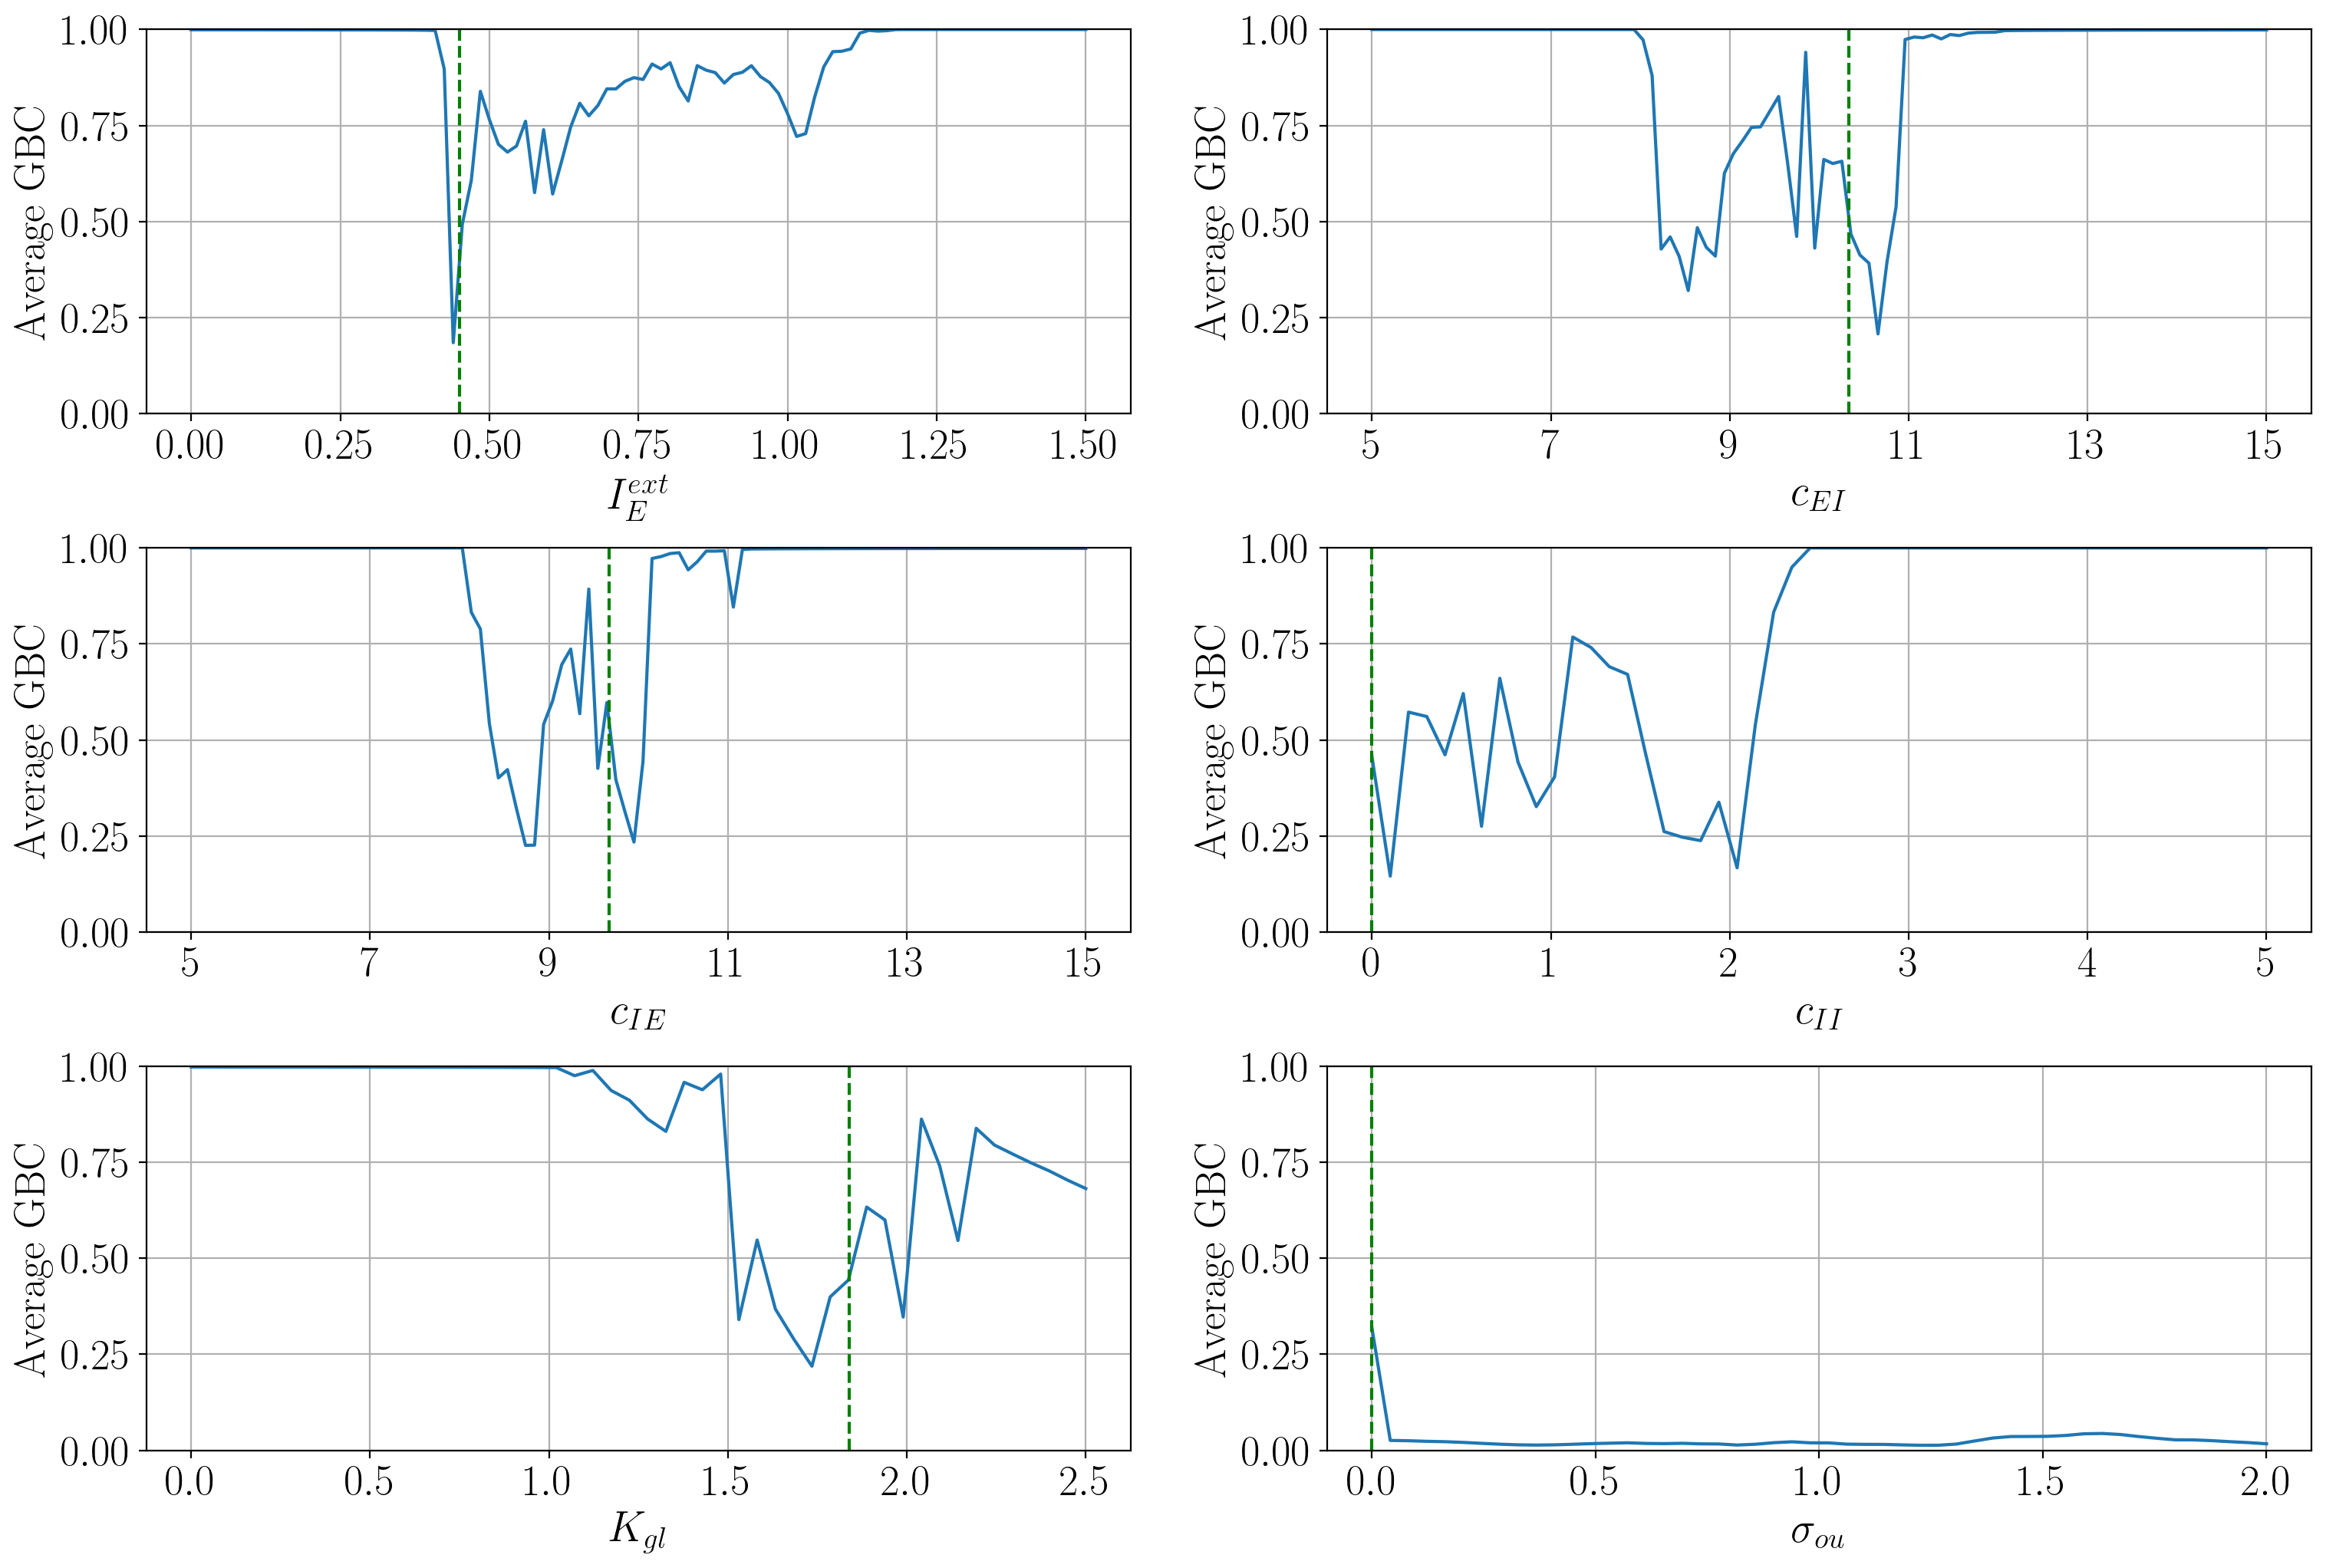

In [35]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import math

# Get the angles from 0 to 2 pie (360 degree) in narray object
#X = np.arange(0, math.pi*2, 0.05)

# Using built-in trigonometric function we can directly plot
# the given cosine wave for the given angles
#Y1 = np.sin(X)
#Y2 = np.cos(X)
#Y3 = np.tan(X)
#Y4 = np.tanh(X)
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(3, 2, figsize=(15,10))
figure.tight_layout()

axis[0, 0].plot(input_excext,gbc_model_excext)
axis[0, 0].set_xlabel("$I^{ext}_{E}$", size=20)
axis[0, 0].set_ylabel('Average GBC', size=20)
axis[0, 0].grid()
axis[0, 0].axvline(x=0.45, ls = '--', color = "green")
axis[0, 0].axis(ymin=0.0,ymax=1.0)


axis[0, 1].plot(input_cexcinh,gbc_model_cexcinh)
axis[0, 1].set_xlabel("$c_{EI}$", size=20)
axis[0, 1].set_ylabel('Average GBC', size=20)
axis[0, 1].set_xticks(range(5, 16, 2))
axis[0, 1].grid()
axis[0, 1].axvline(x=10.33, ls = '--', color = "green")
axis[0, 1].axis(ymin=0.0,ymax=1.0)

axis[1, 0].plot(input_cinhexc,gbc_model_cinhexc)
axis[1, 0].set_xlabel("$c_{IE}$", size=20)
axis[1, 0].set_ylabel('Average GBC', size=20)
axis[1, 0].set_xticks(range(5, 16, 2))
axis[1, 0].grid()
axis[1, 0].axvline(x=9.67, ls = '--', color = "green")
axis[1, 0].axis(ymin=0.0,ymax=1.0)

axis[1, 1].plot(input_cinhinh,gbc_model_cinhinh)
axis[1, 1].set_xlabel("$c_{II}$", size=20)
axis[1, 1].set_ylabel('Average GBC', size=20)
axis[1, 1].grid()
axis[1, 1].axvline(x=0, ls = '--', color = "green")
axis[1, 1].axis(ymin=0.0, ymax=1.0)

axis[2, 0].plot(input_k_gl,gbc_model_k_gl)
axis[2, 0].set_xlabel("$K_{gl}$",size=20)
axis[2, 0].set_ylabel('Average GBC', size=20)
axis[2, 0].grid()
axis[2, 0].axvline(x=1.84, ls = '--', color = "green")
axis[2, 0].axis(ymin=0.0, ymax=1.0)


axis[2, 1].plot(input_sigma_ou,gbc_model_sigma_ou)
axis[2, 1].set_xlabel("$\sigma_{ou}$", size=20)
axis[2, 1].set_ylabel('Average GBC',size=20)
axis[2, 1].grid()
axis[2, 1].axvline(x=4.28e-5, ls = '--', color = "green")
axis[2, 1].axis(ymin=0.0, ymax=1.0)

#figure.suptitle('Change in GBC based on parameters')

# Combine all the operations and display
figure.subplots_adjust(wspace=0.2)
figure.subplots_adjust(hspace=0.35)
figure.set_facecolor('w') 
figure.savefig('exploration.png', bbox_inches='tight')